In [1]:
# !zip -r images.zip images/

In [1]:
import warnings

warnings.filterwarnings("ignore")

### Using Tensorflow like NumPy

In [2]:
import tensorflow as tf
import numpy as np

**Tensors and Operations**

Tensors

In [3]:
t = tf.constant([[1., 2, 3.], [4., 5., 6.]])
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [4]:
t.shape

TensorShape([2, 3])

In [5]:
t.dtype

tf.float32

**Indexing**

In [6]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [7]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

**Ops**

In [8]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [9]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [10]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

**Scalars**

In [11]:
tf.constant(42)

<tf.Tensor: shape=(), dtype=int32, numpy=42>

Keras's low-level API

In [12]:
K = tf.keras.backend
K.square(K.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

In [13]:
tf.square(tf.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

**Tensors and NumPy**

In [14]:
a = np.array([2., 4., 5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [15]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [16]:
np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [17]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [18]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

Type Conversions

In [19]:
try:
  tf.constant(2.0) + tf.constant(40)
except tf.errors.InvalidArgumentError as ex:
  print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2] name: 


In [20]:
try:
  tf.constant(2.0) + tf.constant(40, dtype=tf.float64)
except tf.errors.InvalidArgumentError as ex:
  print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2] name: 


In [21]:
t2 = tf.constant(40, dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

Variables

In [22]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])

In [23]:
v.assign(2 * v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [24]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [25]:
v[:, 2].assign([0., 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [26]:
v.scatter_nd_update(
    indices=[[0, 0], [1, 2]], updates=[100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

In [27]:
sparse_delta = tf.IndexedSlices(values=[[1., 2., 3.], [4., 5., 6.]],
                                indices=[1, 0])
v.scatter_update(sparse_delta)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[4., 5., 6.],
       [1., 2., 3.]], dtype=float32)>

In [28]:
try:
  v[1] = [7., 8., 9.]
except TypeError as ex:
  print(ex)

'ResourceVariable' object does not support item assignment


**Strings**

In [29]:
tf.constant(b"hello world")

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

In [30]:
tf.constant("cafe")

<tf.Tensor: shape=(), dtype=string, numpy=b'cafe'>

In [31]:
u = tf.constant([ord(c) for c in "cafe"])

In [32]:
b = tf.strings.unicode_encode(u, "UTF-8")
tf.strings.length(b, unit="UTF8_CHAR")

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [33]:
tf.strings.unicode_decode(b, "UTF-8")
tf.strings.length(b, unit="UTF8_CHAR")

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [34]:
tf.strings.unicode_decode(b, "UTF-8")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 101], dtype=int32)>

**Other Data Structures**

String Arrays

In [35]:
tf.constant(b"hello world")

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

In [36]:
tf.constant("cafe")

<tf.Tensor: shape=(), dtype=string, numpy=b'cafe'>

In [37]:
u = tf.constant([ord(c) for c in "cafe"])
u

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 101], dtype=int32)>

In [38]:
b = tf.strings.unicode_encode(u, "UTF-8")
b

<tf.Tensor: shape=(), dtype=string, numpy=b'cafe'>

In [39]:
tf.strings.length(b, unit="UTF8_CHAR")

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [40]:
tf.strings.unicode_decode(b, "UTF-8")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 101], dtype=int32)>

In [41]:
p = tf.constant(["Cafe", "Coffee", "caffe", "咖啡"])

In [42]:
tf.strings.length(p, unit="UTF8_CHAR")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([4, 6, 5, 2], dtype=int32)>

In [43]:
r = tf.strings.unicode_decode(p, "UTF8")
r

<tf.RaggedTensor [[67, 97, 102, 101], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 101], [21654, 21857]]>

**Ragged Tensors**

In [44]:
r[1]

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([ 67, 111, 102, 102, 101, 101], dtype=int32)>

In [45]:
r[1:3]

<tf.RaggedTensor [[67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 101]]>

In [46]:
r2 = tf.ragged.constant([[65, 66], [], [67]])
tf.concat([r, r2], axis=0)

<tf.RaggedTensor [[67, 97, 102, 101], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 101], [21654, 21857], [65, 66], [], [67]]>

In [47]:
r3 = tf.ragged.constant([[68, 69, 70], [71], [], [72, 73]])
print(tf.concat([r, r3], axis=1))

<tf.RaggedTensor [[67, 97, 102, 101, 68, 69, 70], [67, 111, 102, 102, 101, 101, 71],
 [99, 97, 102, 102, 101], [21654, 21857, 72, 73]]>


In [48]:
r.to_tensor()

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[   67,    97,   102,   101,     0,     0],
       [   67,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   101,     0],
       [21654, 21857,     0,     0,     0,     0]], dtype=int32)>

**Sparse Tensors**

In [49]:
s = tf.SparseTensor(indices=[[0, 1], [1, 0], [2, 3]],
                    values=[1., 2., 3.],
                    dense_shape=[3, 4])

In [50]:
tf.sparse.to_dense(s)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

In [51]:
s * 42.0

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([ 42.  84. 126.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))

In [52]:
try:
  s + 42.0
except TypeError as ex:
  print(ex)

unsupported operand type(s) for +: 'SparseTensor' and 'float'


In [53]:
s4 = tf.constant([[10., 20.], [30., 40.], [50., 60.], [70., 80.]])
tf.sparse.sparse_dense_matmul(s, s4)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 30.,  40.],
       [ 20.,  40.],
       [210., 240.]], dtype=float32)>

In [54]:
s5 = tf.SparseTensor(indices=[[0, 2], [0, 1]],  # WRONG ORDER
                     values=[1., 2.],
                     dense_shape=[3, 4])

try:
  tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
  print(ex)

{{function_node __wrapped__SparseToDense_device_/job:localhost/replica:0/task:0/device:GPU:0}} indices[1] is out of order. Many sparse ops require sorted indices.
  Use `tf.sparse.reorder` to create a correctly ordered copy.


	 [[{{node SparseToDense}}]] [Op:SparseToDense] name: 


In [55]:
s6 = tf.sparse.reorder(s5)
tf.sparse.to_dense(s6)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

**Tensor Arrays**

In [56]:
array = tf.TensorArray(dtype=tf.float32, size=3)
array = array.write(0, tf.constant([1., 2.]))
array = array.write(1, tf.constant([3., 10.]))
array = array.write(2, tf.constant([5., 7.]))
tensor1 = array.read(1)

In [57]:
array.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

In [58]:
array2 = tf.TensorArray(dtype=tf.float32, size=3, clear_after_read=False)
array2 = array.write(0, tf.constant([1., 2.]))
array2 = array.write(1, tf.constant([3., 10.]))
array2 = array.write(2, tf.constant([5., 7.]))
tensor2 = array.read(1)
array2.stack()

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3578, in run_code
    return outflag  File "<ipython-input-58-ee9bd9b8bd64>", line 2, in <cell line: 2>
    array2 = array.write(0, tf.constant([1., 2.]))  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/tf_should_use.py", line 288, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs),


<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

In [59]:
array3 = tf.TensorArray(dtype=tf.float32, size=0, clear_after_read=False)
array3 = array.write(0, tf.constant([1., 2.]))
array3 = array.write(1, tf.constant([3., 10.]))
array3 = array.write(2, tf.constant([5., 7.]))
tensor3 = array.read(1)
array3.stack()

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3578, in run_code
    return outflag  File "<ipython-input-59-05f83bb92834>", line 2, in <cell line: 2>
    array3 = array.write(0, tf.constant([1., 2.]))  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/tf_should_use.py", line 288, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs),
ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3578, in run_code
    return 

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

**Sets**

In [60]:
a = tf.constant([[1, 5, 9]])
b = tf.constant([[5, 6, 9, 11]])
u = tf.sets.union(a, b)
u

SparseTensor(indices=tf.Tensor(
[[0 0]
 [0 1]
 [0 2]
 [0 3]
 [0 4]], shape=(5, 2), dtype=int64), values=tf.Tensor([ 1  5  6  9 11], shape=(5,), dtype=int32), dense_shape=tf.Tensor([1 5], shape=(2,), dtype=int64))

In [61]:
tf.sparse.to_dense(u)

<tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[ 1,  5,  6,  9, 11]], dtype=int32)>

In [62]:
a = tf.constant([[1, 5, 9], [10, 0, 0]])
b = tf.constant([[5, 6, 9, 11], [13, 0, 0, 0]])
u = tf.sets.union(a, b)
tf.sparse.to_dense(u)

<tf.Tensor: shape=(2, 5), dtype=int32, numpy=
array([[ 1,  5,  6,  9, 11],
       [ 0, 10, 13,  0,  0]], dtype=int32)>

In [63]:
a = tf.constant([[1, 5, 9], [10, -1, -1]])
b = tf.constant([[5, 6, 9, 11], [13, -1, -1, -1]])
u = tf.sets.union(a, b)
tf.sparse.to_dense(u, default_value=-1)

<tf.Tensor: shape=(2, 5), dtype=int32, numpy=
array([[ 1,  5,  6,  9, 11],
       [-1, 10, 13, -1, -1]], dtype=int32)>

In [64]:
set1 = tf.constant([[2, 3, 5, 7], [7, 9, 0, 0]])
set2 = tf.constant([[4, 5, 6], [9, 10, 0]])
tf.sparse.to_dense(tf.sets.difference(set1, set2))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 7],
       [7, 0, 0]], dtype=int32)>

In [65]:
tf.sparse.to_dense(tf.sets.intersection(set1, set2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [0, 9]], dtype=int32)>

In [66]:
tf.sparse.to_dense(tf.sets.intersection(set1[:1], tf.constant([[5, 0, 0, 0]]))) > 0

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3578, in run_code
    return outflag  File "<ipython-input-58-ee9bd9b8bd64>", line 3, in <cell line: 3>
    array2 = array.write(1, tf.constant([3., 10.]))  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/tf_should_use.py", line 288, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs),


<tf.Tensor: shape=(1, 1), dtype=bool, numpy=array([[ True]])>

**Queues**

In [67]:
q = tf.queue.FIFOQueue(3, [tf.int32, tf.string], shapes=[(), ()])
q.enqueue([10, b"windy"])
q.enqueue([15, b"sunny"])
q.size()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [68]:
q.dequeue()

[<tf.Tensor: shape=(), dtype=int32, numpy=10>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'windy'>]

In [69]:
q.enqueue_many([[13, 16], [b'cloudy', b'rainy']])

In [70]:
q.dequeue_many(3)

[<tf.Tensor: shape=(3,), dtype=int32, numpy=array([15, 13, 16], dtype=int32)>,
 <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'sunny', b'cloudy', b'rainy'], dtype=object)>]

### Custom Loss Function

In [71]:
def huber_fn(y_true, y_pred):
  error = y_true - y_pred
  is_small_error = tf.abs(error) < 1
  squared_loss = tf.square(error) / 2
  linear_loss = tf.abs(error) - 0.5
  return tf.where(is_small_error, squared_loss, linear_loss)

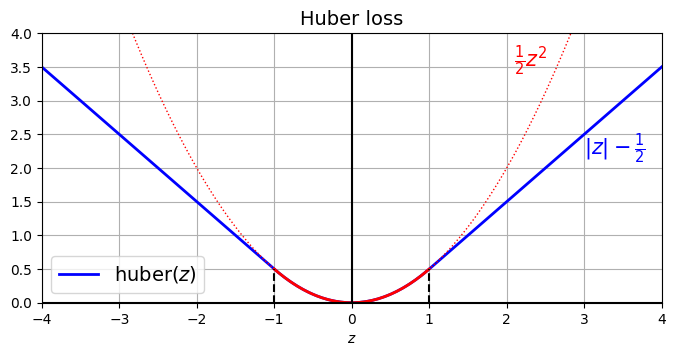

In [72]:
# extra code – shows what the Huber loss looks like

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
z_center = np.linspace(-1, 1, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z ** 2 / 2, "r:", linewidth=1)
plt.plot(z_center, z_center ** 2 / 2, "r", linewidth=2)
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "k--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "k--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.text(2.1, 3.5, r"$\frac{1}{2}z^2$", color="r", fontsize=15)
plt.text(3.0, 2.2, r"$|z| - \frac{1}{2}$", color="b", fontsize=15)
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [73]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

input_shape = X_train.shape[1:]

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1)
])

In [74]:
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

In [75]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 6s 7ms/step - loss: 0.5757 - mae: 0.9427 - val_loss: 0.3248 - val_mae: 0.6402
Epoch 2/2
363/363 [==============================] - 2s 6ms/step - loss: 0.2488 - mae: 0.5548 - val_loss: 0.2220 - val_mae: 0.5116


### Saving / Loading Models with Custom Objects

In [76]:
model.save("my_model_with_a_custom_loss")

In [77]:
model = tf.keras.models.load_model("my_model_with_a_custom_loss",
                                   custom_objects={"huber_fn": huber_fn})

In [78]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 4ms/step - loss: 0.2004 - mae: 0.4860 - val_loss: 0.1831 - val_mae: 0.4603
Epoch 2/2
363/363 [==============================] - 1s 4ms/step - loss: 0.1818 - mae: 0.4602 - val_loss: 0.1694 - val_mae: 0.4469


In [79]:
def create_huber(threshold=1.0):
  def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < threshold
    squared_loss = tf.square(error) / 2
    linear_loss = threshold * tf.abs(error) - threshold ** 2 / 2
    return tf.where(is_small_error, squared_loss, linear_loss)
  return huber_fn

In [80]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=["mae"])

In [81]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 4ms/step - loss: 0.1947 - mae: 0.4532 - val_loss: 0.1798 - val_mae: 0.4367
Epoch 2/2
363/363 [==============================] - 1s 4ms/step - loss: 0.1895 - mae: 0.4463 - val_loss: 0.2014 - val_mae: 0.4506


In [82]:
model.save("my_model_with_a_custom_loss_threshold_2")

In [83]:
model = tf.keras.models.load_model("my_model_with_a_custom_loss_threshold_2",
                                   custom_objects={"huber_fn": create_huber(2.0)})

In [84]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 4ms/step - loss: 0.1869 - mae: 0.4427 - val_loss: 0.1776 - val_mae: 0.4300
Epoch 2/2
363/363 [==============================] - 1s 4ms/step - loss: 0.1842 - mae: 0.4385 - val_loss: 0.1770 - val_mae: 0.4335


In [85]:
class HuberLoss(tf.keras.losses.Loss):
  def __init__(self, threshold=1.0, **kwargs):
    self.threshold = threshold
    super().__init__(**kwargs)

  def call(self, y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < self.threshold
    squared_loss = tf.square(error) / 2
    linear_loss = self.threshold * tf.abs(error) - self.threshold ** 2 / 2
    return tf.where(is_small_error, squared_loss, linear_loss)

  def get_config(self):
    base_config = super().get_config()
    return {**base_config, "threshold": self.threshold}

In [86]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1)
])

In [87]:
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

In [88]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 4ms/step - loss: 0.7948 - mae: 0.9432 - val_loss: 0.3315 - val_mae: 0.5752
Epoch 2/2
363/363 [==============================] - 1s 4ms/step - loss: 0.2634 - mae: 0.5279 - val_loss: 0.2497 - val_mae: 0.5025


In [89]:
model.save("my_model_with_a_custom_loss_class")

In [90]:
model = tf.keras.models.load_model("my_model_with_a_custom_loss_class",
                                   custom_objects={"HuberLoss": HuberLoss})

In [91]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 3s 5ms/step - loss: 0.2217 - mae: 0.4833 - val_loss: 0.2279 - val_mae: 0.4678
Epoch 2/2
363/363 [==============================] - 1s 4ms/step - loss: 0.2044 - mae: 0.4625 - val_loss: 0.2039 - val_mae: 0.4548


In [92]:
model.loss.threshold

2.0

### Other Custom Functions

In [93]:
def my_softplus(z):
  return tf.math.log(1.0 + tf.exp(z))

def my_glorot_initializer(shape, dtype=tf.float32):
  stddev = tf.sqrt(2. / (shape[0] + shape[1]))
  return tf.random.normal(shape, stddev=stddev, dtype=dtype)

def my_l1_regularizer(weights):
  return tf.reduce_sum(tf.abs(0.01 * weights))

def my_positive_weights(weights):
  return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [94]:
layer = tf.keras.layers.Dense(1, activation=my_softplus,
                              kernel_initializer=my_glorot_initializer,
                              kernel_regularizer=my_l1_regularizer,
                              kernel_constraint=my_positive_weights)

In [95]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1, activation=my_softplus,
                              kernel_initializer=my_glorot_initializer,
                              kernel_regularizer=my_l1_regularizer,
                              kernel_constraint=my_positive_weights)
])
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.save("my_model_with_many_custom_parts")
model = tf.keras.models.load_model(
    "my_model_with_many_custom_parts",
    custom_objects={
        "my_glorot_initializer": my_glorot_initializer,
        "my_l1_regularizer": my_l1_regularizer,
        "my_positive_weights": my_positive_weights,
        "my_softplus": my_softplus
    }
)
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 3s 4ms/step - loss: 1.7379 - mae: 0.8994 - val_loss: 2.0659 - val_mae: 0.7312
Epoch 2/2
363/363 [==============================] - 2s 4ms/step - loss: 0.9045 - mae: 0.6597 - val_loss: 1.1499 - val_mae: 0.6122
Epoch 1/2
363/363 [==============================] - 3s 4ms/step - loss: 0.6478 - mae: 0.5790 - val_loss: 0.6665 - val_mae: 0.5422
Epoch 2/2
363/363 [==============================] - 2s 4ms/step - loss: 0.5494 - mae: 0.5338 - val_loss: 0.5696 - val_mae: 0.5122


In [96]:
class MyL1Regularizer(tf.keras.regularizers.Regularizer):
  def __init__(self, factor):
    self.factor = factor

  def __call__(self, weights):
    return tf.reduce_sum(tf.abs(self.factor * weights))

  def get_config(self):
    return {"factor": self.factor}

In [97]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1, activation=my_softplus,
                              kernel_regularizer=MyL1Regularizer(0.01),
                              kernel_constraint=my_positive_weights,
                              kernel_initializer=my_glorot_initializer)
])
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.save("my_model_with_many_custom_parts")
model = tf.keras.models.load_model(
    "my_model_with_many_custom_parts",
    custom_objects={
        "MyL1Regularizer": MyL1Regularizer,
        "my_positive_weights": my_positive_weights,
        "my_glorot_initializer": my_glorot_initializer,
        "my_softplus": my_softplus
    }
)
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 3s 4ms/step - loss: 1.2308 - mae: 0.7406 - val_loss: inf - val_mae: inf
Epoch 2/2
363/363 [==============================] - 2s 4ms/step - loss: 0.8152 - mae: 0.6082 - val_loss: inf - val_mae: inf
Epoch 1/2
363/363 [==============================] - 3s 6ms/step - loss: 0.5973 - mae: 0.5362 - val_loss: inf - val_mae: inf
Epoch 2/2
363/363 [==============================] - 3s 8ms/step - loss: 0.5246 - mae: 0.5015 - val_loss: 2.5490 - val_mae: 0.5176


### Custom Metrics

In [98]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1)
])

In [99]:
model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

In [100]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 3s 3ms/step - loss: 2.8821 - huber_fn: 1.1540
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.7352 - huber_fn: 0.3564


### Streaming metrics

In [101]:
precision = tf.keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [102]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [103]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [104]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [105]:
precision.reset_states()

In [106]:
class HuberMetric(tf.keras.metrics.Metric):
  def __init__(self, threshold=1.0, **kwargs):
    super().__init__(**kwargs)
    self.threshold = threshold
    self.huber_fn = create_huber(threshold)
    self.total = self.add_weight("total", initializer="zeros")
    self.count = self.add_weight("count", initializer="zeros")

  def update_state(self, y_true, y_pred, sample_weight=None):
    sample_metrics = self.huber_fn(y_true, y_pred)
    self.total.assign_add(tf.reduce_sum(sample_metrics))
    self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))

  def result(self):
    return self.total / self.count

  def get_config(self):
    base_config = super().get_config()
    return {**base_config, "threshold": self.threshold}

In [107]:
m = HuberMetric(2.)

# total = 2 * |10 - 2| - 2²/2 = 14
# count = 1
# result = 14 / 1 = 14
m(tf.constant([[2.]]), tf.constant([[10.]]))

<tf.Tensor: shape=(), dtype=float32, numpy=14.0>

In [108]:
# total = total + (|1 - 0|² / 2) + (2 * |9.25 - 5| - 2² / 2) = 14 + 7 = 21
# count = count + 2 = 3
# result = total / count = 21 / 3 = 7
m(tf.constant([[0.], [5.]]), tf.constant([[1.], [9.25]]))

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [109]:
m.result()

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [110]:
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=21.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=3.0>]

In [111]:
m.reset_states()
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=0.0>]

In [112]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1)
])

In [113]:
model.compile(loss=create_huber(2.0), optimizer="nadam",
              metrics=[HuberMetric(2.0)])

In [114]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 2s 3ms/step - loss: 0.8182 - huber_metric_1: 0.8182
Epoch 2/2
363/363 [==============================] - 2s 4ms/step - loss: 0.3206 - huber_metric_1: 0.3206


In [115]:
model.save("my_model_with_a_custom_metric")

In [116]:
model = tf.keras.models.load_model(
    "my_model_with_a_custom_metric",
    custom_objects={
        "huber_fn": create_huber(2.0),
        "HuberMetric": HuberMetric
    }
)

In [117]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 2s 3ms/step - loss: 0.2440 - huber_metric_1: 0.2440
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.2164 - huber_metric_1: 0.2164


In [118]:
class HuberMetric(tf.keras.metrics.Mean):
    def __init__(self, threshold=1.0, name='HuberMetric', dtype=None):
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        super().__init__(name=name, dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        super(HuberMetric, self).update_state(metric, sample_weight)

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [119]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1),
])

In [120]:
model.compile(loss=tf.keras.losses.Huber(2.0), optimizer="nadam",
              weighted_metrics=[HuberMetric(2.0)])

In [121]:
np.random.seed(42)
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled, y_train, epochs=2,
                    sample_weight=sample_weight)

Epoch 1/2
363/363 [==============================] - 2s 4ms/step - loss: 0.6517 - HuberMetric: 1.3133
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.1949 - HuberMetric: 0.3928


In [122]:
(history.history["loss"][0],
 history.history["HuberMetric"][0] * sample_weight.mean())

(0.6517029404640198, 0.651703006104377)

In [123]:
model.save("my_model_with_a_custom_metric_v2")

In [124]:
model = tf.keras.models.load_model("my_model_with_a_custom_metric_v2",
                                   custom_objects={"HuberMetric": HuberMetric})

In [125]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 2s 3ms/step - loss: 0.2972 - HuberMetric: 0.2972
Epoch 2/2
363/363 [==============================] - 1s 4ms/step - loss: 0.2499 - HuberMetric: 0.2499


In [126]:
model.metrics[-1].threshold

2.0

Custom Layers

In [127]:
exponential_layer = tf.keras.layers.Lambda(lambda x: tf.exp(x))

In [128]:
exponential_layer([-1., 0., 1.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787948, 1.        , 2.7182817 ], dtype=float32)>

In [129]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    tf.keras.layers.Dense(1),
    exponential_layer
])

model.compile(loss="mse", optimizer="sgd")
model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/5
363/363 [==============================] - 2s 4ms/step - loss: 1.0579 - val_loss: 0.4072
Epoch 2/5
363/363 [==============================] - 1s 4ms/step - loss: 0.5168 - val_loss: 0.3856
Epoch 3/5
363/363 [==============================] - 1s 3ms/step - loss: 0.4109 - val_loss: 0.3588
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 0.4515 - val_loss: 0.3585
Epoch 5/5
162/162 [==============================] - 0s 2ms/step - loss: 0.3709


0.3708544075489044

### Custom Models

In [130]:
class ResidualBlock(tf.keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu",
                                             kernel_initializer="he_normal")
                       for _ in range(n_layers)]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

In [131]:
class ResidualRegressor(tf.keras.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = tf.keras.layers.Dense(30, activation="relu",
                                             kernel_initializer="he_normal")
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = tf.keras.layers.Dense(output_dim)

    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

In [132]:
# extra code – shows that the model can be used normally
tf.random.set_seed(42)
model = ResidualRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=2)
score = model.evaluate(X_test_scaled, y_test)
model.save("my_custom_model")

Epoch 1/2
363/363 [==============================] - 5s 5ms/step - loss: 11.1178
Epoch 2/2
162/162 [==============================] - 1s 2ms/step - loss: 0.7469


In [133]:
model = tf.keras.models.load_model("my_custom_model")
history = model.fit(X_train_scaled, y_train, epochs=2)
model.predict(X_test_scaled[:3])

Epoch 1/2
363/363 [==============================] - 4s 5ms/step - loss: 0.7054
Epoch 2/2
1/1 [==============================] - 0s 91ms/step


array([[0.6003153],
       [1.3653979],
       [3.5207598]], dtype=float32)

In [134]:
tf.random.set_seed(42)
block1 = ResidualBlock(2, 30)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu",
                          kernel_initializer="he_normal"),
    block1, block1, block1, block1,
    ResidualBlock(2, 30),
    tf.keras.layers.Dense(1)
])

### Losses and Metrics Based on Model Internals

In [135]:
class ReconstructingRegressor(tf.keras.Model):
  def __init__(self, output_dim, **kwargs):
    super().__init__(**kwargs)
    self.hidden = [tf.keras.layers.Dense(30, activation="relu",
                                         kernel_initializer="he_normal")
                    for _ in range(5)]
    self.out = tf.keras.layers.Dense(output_dim)
    self.reconstruction_mean = tf.keras.metrics.Mean(
        name="reconstruction_error")

  def build(self, batch_input_shape):
    n_inputs = batch_input_shape[-1]
    self.reconstruct = tf.keras.layers.Dense(n_inputs)
    self.built = True

  def call(self, inputs, training=None):
    Z = inputs
    for layer in self.hidden:
      Z = layer(Z)
    reconstruction = self.reconstruct(Z)
    recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
    self.add_loss(0.05 * recon_loss)
    if training:
      result = self.reconstruction_mean(recon_loss)
      self.add_metric(result)
    return self.out(Z)

In [136]:
tf.random.set_seed(42)
model = ReconstructingRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)

y_pred = model.predict(X_test_scaled)

Epoch 1/5
363/363 [==============================] - 5s 5ms/step - loss: 0.9012 - reconstruction_error: 1.2718
Epoch 2/5
363/363 [==============================] - 2s 5ms/step - loss: 0.4540 - reconstruction_error: 0.6856
Epoch 3/5
363/363 [==============================] - 2s 5ms/step - loss: 0.4436 - reconstruction_error: 0.5246
Epoch 4/5
363/363 [==============================] - 2s 6ms/step - loss: 0.3713 - reconstruction_error: 0.4474
Epoch 5/5
162/162 [==============================] - 0s 2ms/step


### Computing Gradients Using Autodiff

In [137]:
def f(w1, w2):
  return 3 * w1 ** 2 + 2 * w1 * w2

In [138]:
w1, w2 = 5, 3
eps = 1e-6
(f(w1 + eps, w2) - f(w1, w2)) / eps

36.000003007075065

In [139]:
(f(w1, w2 + eps) - f(w1, w2)) / eps

10.000000003174137

In [140]:
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
  z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2])

In [141]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [142]:
with tf.GradientTape() as tape:
  z = f(w1, w2)

dz_w1 = tape.gradient(z, w1)
try:
  dz_w2 = tape.gradient(z, w2)
except RuntimeError as ex:
  print(ex)

A non-persistent GradientTape can only be used to compute one set of gradients (or jacobians)


In [143]:
with tf.GradientTape(persistent=True) as tape:
  z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2)
del tape

In [144]:
dz_dw1, dz_dw2

(<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>)

In [145]:
c1, c2 = tf.constant(5.), tf.constant(3.)
with tf.GradientTape() as tape:
  z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])

In [146]:
gradients

[None, None]

In [147]:
with tf.GradientTape() as tape:
  tape.watch(c1)
  tape.watch(c2)
  z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])

In [148]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [149]:
with tf.GradientTape() as tape:
  z1 = f(w1, w2 + 2.)
  z2 = f(w1, w2 + 5.)
  z3 = f(w1, w2 + 7.)

tape.gradient([z1, z2, z3], [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=136.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=30.0>]

In [150]:
with tf.GradientTape() as tape:
  z1 = f(w1, w2 + 2.)
  z2 = f(w1, w2 + 5.)
  z3 = f(w1, w2 + 7.)
  z = z1 + z2 + z3

tape.gradient(z, [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=136.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=30.0>]

In [151]:
with tf.GradientTape(persistent=True) as hessian_tape:
  with tf.GradientTape() as jacobian_tape:
    z = f(w1, w2)

  jacobians = jacobian_tape.gradient(z, [w1, w2])
hessians = [hessian_tape.gradient(jacobian, [w1, w2])
              for jacobian in jacobians]
del hessian_tape

In [152]:
jacobians

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [153]:
hessians

[[<tf.Tensor: shape=(), dtype=float32, numpy=6.0>,
  <tf.Tensor: shape=(), dtype=float32, numpy=2.0>],
 [<tf.Tensor: shape=(), dtype=float32, numpy=2.0>, None]]

In [154]:
def f(w1, w2):
  return 3 * w1 ** 2 + tf.stop_gradient(2 * w1 * w2)

with tf.GradientTape() as tape:
  z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2])

In [155]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=30.0>, None]

In [156]:
x = tf.Variable(1e-50)
with tf.GradientTape() as tape:
  z = tf.sqrt(x)

tape.gradient(z, [x])

[<tf.Tensor: shape=(), dtype=float32, numpy=inf>]

In [157]:
tf.math.log(tf.exp(tf.constant(30., dtype=tf.float32)) + 1.)

<tf.Tensor: shape=(), dtype=float32, numpy=30.0>

In [158]:
x = tf.Variable([1.0e30])
with tf.GradientTape() as tape:
  z = my_softplus(x)

tape.gradient(z, [x])

[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>]

In [159]:
def my_softplus(z):
  return tf.math.log(1 + tf.exp(-tf.abs(z))) + tf.maximum(0., z)

In [160]:
@tf.custom_gradient
def my_softplus(z):
  def my_softplus_gradients(grads):
    return grads * (1 - 1 / (1 + tf.exp(z)))

  result = tf.math.log(1 + tf.exp(-tf.abs(z))) + tf.maximum(0., z)
  return result, my_softplus_gradients

In [161]:
# extra code – shows that the function is now stable, as well as its gradients
x = tf.Variable([1000.])
with tf.GradientTape() as tape:
    z = my_softplus(x)

z, tape.gradient(z, [x])

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1000.], dtype=float32)>,
 [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>])

### Custom Training Loops

In [162]:
tf.random.set_seed(42)
l2_reg = tf.keras.regularizers.l2(0.05)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                           kernel_regularizer=l2_reg),
    tf.keras.layers.Dense(1, kernel_regularizer=l2_reg)
])

In [163]:
def random_batch(X, y, batch_size=32):
  idx = np.random.randint(len(X), size=batch_size)
  return X[idx], y[idx]

In [164]:
def print_status_bar(step, total, loss, metrics=None):
  metrics = " - ".join([f"{m.name}: {m.result():.4f}"
                        for m in [loss] + (metrics or [])])
  end = "" if step < total else "\n"
  print(f"\r{step}/{total} - " + metrics, end=end)

In [165]:
np.random.seed(42)
tf.random.set_seed(42)

In [166]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
loss_fn = tf.keras.losses.mean_squared_error
mean_loss = tf.keras.metrics.Mean()
metrics = [tf.keras.metrics.MeanAbsoluteError()]

In [167]:
for epoch in range(1, n_epochs + 1):
  print(f"Epoch {epoch}/{n_epochs}")
  for step in range(1, n_steps + 1):
    X_batch, y_batch = random_batch(X_train_scaled, y_train)
    with tf.GradientTape() as tape:
      y_pred = model(X_batch, training=True)
      main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
      loss = tf.add_n([main_loss] + model.losses)

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    for variable in model.variables:
      if variable.constraint is not None:
        variable.assign(variable.constrain(variable))

    mean_loss(loss)
    for metric in metrics:
      metric(y_batch, y_pred)

    print_status_bar(step, n_steps, mean_loss, metrics)

  for metric in [mean_loss] + metrics:
    metric.reset_states()

Epoch 1/5
362/362 - mean: 3.2586 - mean_absolute_error: 0.6669
Epoch 2/5
362/362 - mean: 1.7417 - mean_absolute_error: 0.5435
Epoch 3/5
362/362 - mean: 1.0732 - mean_absolute_error: 0.4886
Epoch 4/5
362/362 - mean: 0.8308 - mean_absolute_error: 0.4919
Epoch 5/5
362/362 - mean: 0.7165 - mean_absolute_error: 0.4970


In [168]:
from tqdm.notebook import trange
from collections import OrderedDict

with trange(1, n_epochs + 1, desc="All epochs") as epochs:
  for epoch in epochs:
    with trange(1, n_steps + 1, desc=f"Epoch {epoch}/{n_epochs}") as steps:
      for step in steps:
        X_batch, y_batch = random_batch(X_train_scaled, y_train)
        with tf.GradientTape() as tape:
          y_pred = model(X_batch)
          main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
          loss = tf.add_n([main_loss] + model.losses)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        for variable in model.variables:
          if variable.constraint is not None:
            variable.assign(variable.constrain(variable))

        status = OrderedDict()
        mean_loss(loss)
        status["loss"] = mean_loss.result().numpy()
        for metric in metrics:
          metric(y_batch, y_pred)
          status[metric.name] = metric.result().numpy()

        steps.set_postfix(status)

    for metric in [mean_loss] + metrics:
      metric.reset_states()

All epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/5:   0%|          | 0/362 [00:00<?, ?it/s]

Epoch 2/5:   0%|          | 0/362 [00:00<?, ?it/s]

Epoch 3/5:   0%|          | 0/362 [00:00<?, ?it/s]

Epoch 4/5:   0%|          | 0/362 [00:00<?, ?it/s]

Epoch 5/5:   0%|          | 0/362 [00:00<?, ?it/s]

### TensorFlow Functions

In [169]:
def cube(x):
  return x ** 3

In [170]:
cube(2)

8

In [171]:
cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [172]:
tf_cube = tf.function(cube)
tf_cube

In [173]:
tf_cube(2)

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [174]:
tf_cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [175]:
@tf.function
def tf_cube(x):
  return x ** 3

### TF Functions and Concrete Functions

In [176]:
concrete_function = tf_cube.get_concrete_function(tf.constant(2.0))
concrete_function

<ConcreteFunction tf_cube(x) at 0x7ED3A5A1D780>

In [177]:
concrete_function(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [178]:
concrete_function is tf_cube.get_concrete_function(tf.constant(2.0))

True

### Exploring Function Definitions and Graphs

In [179]:
concrete_function.graph

In [180]:
ops = concrete_function.graph.get_operations()
ops

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'pow/y' type=Const>,
 <tf.Operation 'pow' type=Pow>,
 <tf.Operation 'Identity' type=Identity>]

In [181]:
pow_op = ops[2]
list(pow_op.inputs)

[<tf.Tensor 'x:0' shape=() dtype=float32>,
 <tf.Tensor 'pow/y:0' shape=() dtype=float32>]

In [182]:
pow_op.outputs

[<tf.Tensor 'pow:0' shape=() dtype=float32>]

In [183]:
concrete_function.graph.get_operation_by_name('x')

<tf.Operation 'x' type=Placeholder>

In [184]:
concrete_function.graph.get_tensor_by_name('Identity:0')

<tf.Tensor 'Identity:0' shape=() dtype=float32>

In [185]:
concrete_function.function_def.signature

name: "__inference_tf_cube_456827"
input_arg {
  name: "x"
  type: DT_FLOAT
}
output_arg {
  name: "identity"
  type: DT_FLOAT
}

How TF Functions Trace Python Functions to Extract Their Computation Graphs

In [186]:
@tf.function
def tf_cube(x):
  print(f"x = {x}")
  return x ** 3

In [187]:
result = tf_cube(tf.constant(2.0))

x = Tensor("x:0", shape=(), dtype=float32)


In [188]:
result

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [189]:
result = tf_cube(2)

x = 2


In [190]:
result = tf_cube(2)

In [191]:
result = tf_cube(tf.constant([[1., 2.]]))

x = Tensor("x:0", shape=(1, 2), dtype=float32)


In [192]:
result = tf_cube(tf.constant([[3., 4.], [5., 6.]]))

x = Tensor("x:0", shape=(2, 2), dtype=float32)


In [193]:
result = tf_cube(tf.constant([[7., 8.], [9., 10.]]))

In [194]:
@tf.function(input_signature=[tf.TensorSpec([None, 28, 28], tf.float32)])
def shrink(images):
  print("Tracing", images)
  return images[:, ::2, ::2]

In [195]:
tf.random.set_seed(42)

In [196]:
img_batch_1 = tf.random.uniform(shape=[100, 28, 28])
img_batch_2 = tf.random.uniform(shape=[50, 28, 28])
preprocessed_images = shrink(img_batch_1)
preprocessed_images = shrink(img_batch_2)

Tracing Tensor("images:0", shape=(None, 28, 28), dtype=float32)


In [198]:
img_batch_3 = tf.random.uniform(shape=[2, 2, 2])
try:
    preprocessed_images = shrink(img_batch_3)  # ValueError! Incompatible inputs
except ValueError as ex:
    print(ex)

TypeError: ignored

### Using Autograph to Capture Control Flow

In [199]:
@tf.function
def add_10(x):
  for i in range(10):
    x += 1
  return x

In [200]:
add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [201]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'add/y' type=Const>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'add_1/y' type=Const>,
 <tf.Operation 'add_1' type=AddV2>,
 <tf.Operation 'add_2/y' type=Const>,
 <tf.Operation 'add_2' type=AddV2>,
 <tf.Operation 'add_3/y' type=Const>,
 <tf.Operation 'add_3' type=AddV2>,
 <tf.Operation 'add_4/y' type=Const>,
 <tf.Operation 'add_4' type=AddV2>,
 <tf.Operation 'add_5/y' type=Const>,
 <tf.Operation 'add_5' type=AddV2>,
 <tf.Operation 'add_6/y' type=Const>,
 <tf.Operation 'add_6' type=AddV2>,
 <tf.Operation 'add_7/y' type=Const>,
 <tf.Operation 'add_7' type=AddV2>,
 <tf.Operation 'add_8/y' type=Const>,
 <tf.Operation 'add_8' type=AddV2>,
 <tf.Operation 'add_9/y' type=Const>,
 <tf.Operation 'add_9' type=AddV2>,
 <tf.Operation 'Identity' type=Identity>]

In [202]:
@tf.function
def add_10(x):
  condition = lambda i, x: tf.less(i, 10)
  body = lambda i, x: (tf.add(i, 1), tf.add(x, 1))
  final_i, final_x = tf.while_loop(condition, body, [tf.constant(0), x])
  return final_x

In [203]:
add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [204]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'Const' type=Const>,
 <tf.Operation 'while/maximum_iterations' type=Const>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=StatelessWhile>,
 <tf.Operation 'Identity' type=Identity>]

In [205]:
@tf.function
def add_10(x):
  for i in range(10):
    x += 1
  return x

In [206]:
add_10.get_concrete_function(tf.constant(0)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'add/y' type=Const>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'add_1/y' type=Const>,
 <tf.Operation 'add_1' type=AddV2>,
 <tf.Operation 'add_2/y' type=Const>,
 <tf.Operation 'add_2' type=AddV2>,
 <tf.Operation 'add_3/y' type=Const>,
 <tf.Operation 'add_3' type=AddV2>,
 <tf.Operation 'add_4/y' type=Const>,
 <tf.Operation 'add_4' type=AddV2>,
 <tf.Operation 'add_5/y' type=Const>,
 <tf.Operation 'add_5' type=AddV2>,
 <tf.Operation 'add_6/y' type=Const>,
 <tf.Operation 'add_6' type=AddV2>,
 <tf.Operation 'add_7/y' type=Const>,
 <tf.Operation 'add_7' type=AddV2>,
 <tf.Operation 'add_8/y' type=Const>,
 <tf.Operation 'add_8' type=AddV2>,
 <tf.Operation 'add_9/y' type=Const>,
 <tf.Operation 'add_9' type=AddV2>,
 <tf.Operation 'Identity' type=Identity>]

### Handling Variables and Other Resources in TF Functions

In [207]:
counter = tf.Variable(0)

@tf.function
def increment(counter, c=1):
  return counter.assign_add(c)

increment(counter)
increment(counter)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [208]:
function_def = increment.get_concrete_function(counter).function_def
function_def.signature.input_arg[0]

name: "counter"
type: DT_RESOURCE

In [209]:
counter = tf.Variable(0)

@tf.function
def increment(c=1):
  return counter.assign_add(c)

In [210]:
increment()
increment()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [211]:
function_def = increment.get_concrete_function(counter).function_def
function_def.signature.input_arg[0]

name: "c"
type: DT_RESOURCE

In [212]:
class Counter:
  def __init__(self):
    self.counter = tf.Variable(0)

  @tf.function
  def increment(self, c=1):
    return self.counter.assign_add(c)

In [213]:
c = Counter()
c.increment()
c.increment()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [214]:
@tf.function
def add_10(x):
  for i in range(10):
    x += 1
  return x

print(tf.autograph.to_code(add_10.python_function))

def tf__add(x):
    with ag__.FunctionScope('add_10', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()

        def get_state():
            return (x,)

        def set_state(vars_):
            nonlocal x
            (x,) = vars_

        def loop_body(itr):
            nonlocal x
            i = itr
            x = ag__.ld(x)
            x += 1
        i = ag__.Undefined('i')
        ag__.for_stmt(ag__.converted_call(ag__.ld(range), (10,), None, fscope), None, loop_body, get_state, set_state, ('x',), {'iterate_names': 'i'})
        try:
            do_return = True
            retval_ = ag__.ld(x)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)



In [215]:
def display_tf_code(func):
  from IPython.display import display, Markdown
  if hasattr(func, "python_function"):
    func = func.python_function
  code = tf.autograph.to_code(func)
  display(Markdown(f'```python\n{code}\n````'))

In [216]:
display_tf_code(add_10)

```python
def tf__add(x):
    with ag__.FunctionScope('add_10', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()

        def get_state():
            return (x,)

        def set_state(vars_):
            nonlocal x
            (x,) = vars_

        def loop_body(itr):
            nonlocal x
            i = itr
            x = ag__.ld(x)
            x += 1
        i = ag__.Undefined('i')
        ag__.for_stmt(ag__.converted_call(ag__.ld(range), (10,), None, fscope), None, loop_body, get_state, set_state, ('x',), {'iterate_names': 'i'})
        try:
            do_return = True
            retval_ = ag__.ld(x)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

````

### Using TF Functions with tf.keras

In [217]:
# Custom loss function
def my_mse(y_true, y_pred):
    print("Tracing loss my_mse()")
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [218]:
# Custom metric function
def my_mae(y_true, y_pred):
    print("Tracing metric my_mae()")
    return tf.reduce_mean(tf.abs(y_pred - y_true))

In [219]:
# Custom layer
class MyDense(tf.keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, input_shape):
        self.kernel = self.add_weight(name='kernel',
                                      shape=(input_shape[1], self.units),
                                      initializer='uniform',
                                      trainable=True)
        self.biases = self.add_weight(name='bias',
                                      shape=(self.units,),
                                      initializer='zeros',
                                      trainable=True)
        super().build(input_shape)

    def call(self, X):
        print("Tracing MyDense.call()")
        return self.activation(X @ self.kernel + self.biases)

In [220]:
tf.random.set_seed(42)

In [221]:
# Custom model
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = MyDense(30, activation="relu")
        self.hidden2 = MyDense(30, activation="relu")
        self.output_ = MyDense(1)

    def call(self, input):
        print("Tracing MyModel.call()")
        hidden1 = self.hidden1(input)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([input, hidden2])
        output = self.output_(concat)
        return output

model = MyModel()

In [222]:
model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae])

In [223]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
350/363 [===========================>..] - ETA: 0s - loss: 1.3897 - my_mae: 0.8116Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
363/363 [==============================] - 6s 5ms/step - loss: 1.3606 - my_mae: 0.8008 - val_loss: 0.4974 - val_my_mae: 0.4796
Epoch 2/2
162/162 [==============================] - 0s 2ms/step - loss: 0.4235 - my_mae: 0.4735


[0.42352062463760376, 0.4735322594642639]

In [224]:
tf.random.set_seed(42)

In [225]:
model = MyModel(dynamic=True)

In [226]:
model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae])

In [227]:
model.fit(X_train_scaled[:64], y_train[:64], epochs=1,
          validation_data=(X_valid_scaled[:64], y_valid[:64]), verbose=0)
model.evaluate(X_test_scaled[:64], y_test[:64], verbose=0)

Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()


Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()


[5.588837146759033, 2.0675313472747803]

In [228]:
tf.random.set_seed(42)

In [229]:
model = MyModel()

In [230]:
model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae], run_eagerly=True)

In [231]:
model.fit(X_train_scaled[:64], y_train[:64], epochs=1,
          validation_data=(X_valid_scaled[:64], y_valid[:64]), verbose=0)
model.evaluate(X_test_scaled[:64], y_test[:64], verbose=0)

Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()


[5.598769664764404, 2.062700033187866]